## Stroke Prediction


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### Import Data and Required Packages

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1. Problem statement
- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### 2. Understanding the Data
- Dataset Source - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
- The data consists of 12 column and 5110 rows.

#### 2.1. Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stroke.csv')

#### 2.2. Show Top 5 Records

In [4]:
print(f"Shape of the Dataset is: {df.shape}")
df.head()

Shape of the Dataset is: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### 2.3. Dataset information

1) **id**: unique identifier
2) **gender**: "Male", "Female" or "Other"
3) **age**: age of the patient
4) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) **ever_married**: "No" or "Yes"
7) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) **Residence_type**: "Rural" or "Urban"
9) **avg_glucose_level**: average glucose level in blood
10) **bmi**: body mass index
11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) **stroke**: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set

#### 3.1. Check Missing values

In [5]:
df.drop(columns=['id'], inplace=True)
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing values in the bmi.

#### 3.2. Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicates  values in the data set

#### 3.3. Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### 3.4. Checking the number of unique values of each column

In [8]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [10]:
for column in df.select_dtypes(include='object').columns:
    print(f"--- Frequency of each category in {column} ---")
    print(df[column].value_counts())
    print("\n")

--- Frequency of each category in gender ---
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


--- Frequency of each category in ever_married ---
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


--- Frequency of each category in work_type ---
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


--- Frequency of each category in Residence_type ---
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


--- Frequency of each category in smoking_status ---
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64




- The "Other" category in the Age variable is extremely rare with just 1 record. It’s generally a good idea to remove or combine with male or female categories.
- The "Never_worked" category in the work_type varibale rare with jush 22 record. One approach is to combine children and never_worked together and label it as "Other"


You're trying to combine rare categories in a categorical column to reduce the number of dummy variables when doing one-hot encoding. This helps simplify the model and avoid creating too many sparse features.

#### 3.5. Check statistics of data set

In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Insight**
- Age ranges from 0.08 to 82 years, with a mean of ~43 years
- Only about 9.7% of patients have hypertension (mean = 0.097)
- Only about 5.4% have heart disease (mean = 0.054) 
- Average glucose level ranges from 55.12 to 271.74, with mean of 106.15
- BMI ranges from 10.3 to 97.6, with mean of 28.89
- Only about 4.9% of patients had a stroke (mean = 0.049)
- BMI has some missing values (4909 non-null values vs 5110 total rows)

### 4. Exploring Data ( Visualization )

#### 4.1. Continous Features

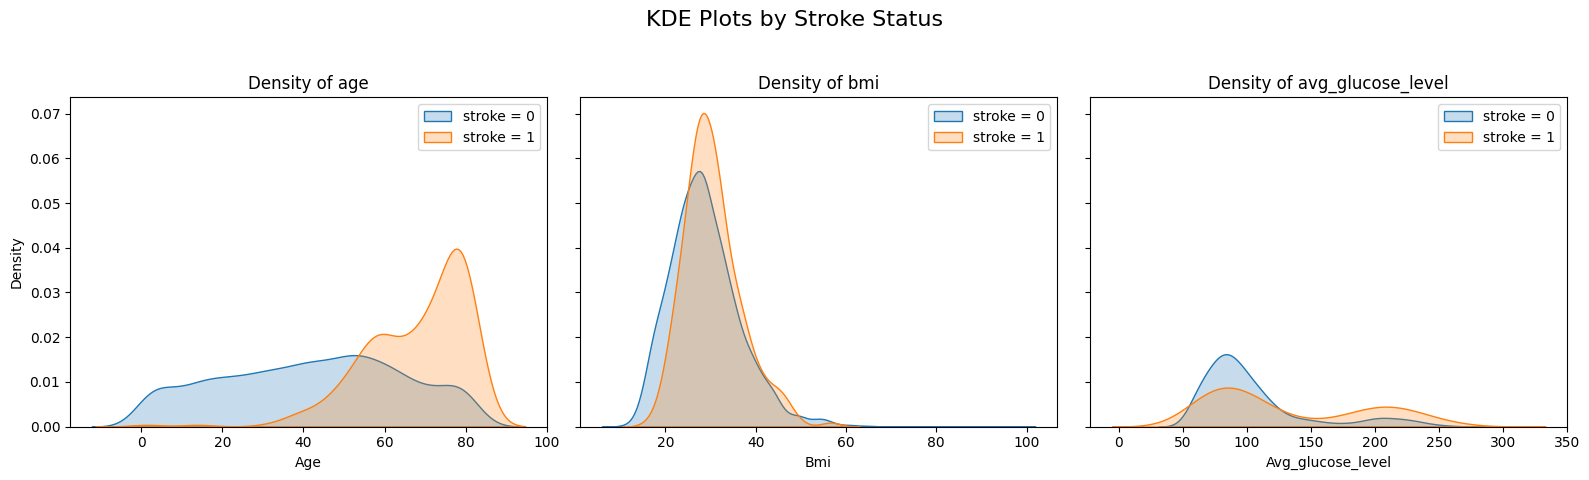

In [15]:
numerical_features = ['age', 'bmi', 'avg_glucose_level']

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

for i, var in enumerate(numerical_features):
    sns.kdeplot(data=df[df['stroke'] == 0], x=var, label='stroke = 0', ax=axes[i], shade=True)
    sns.kdeplot(data=df[df['stroke'] == 1], x=var, label='stroke = 1', ax=axes[i], shade=True)
    
    axes[i].set_title(f'Density of {var}')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.suptitle("KDE Plots by Stroke Status", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- **Age**: Stroke risk is strongly associated with older age. Most strokes occur in people over 60, with the highest density in those around 75–80 years old, while younger people rarely experience strokes.

- **BMI**: Individuals who have experienced a stroke tend to have a slightly higher and more concentrated BMI distribution than those who have not. This indicates a possible association between higher BMI and stroke

- **Avg_glucose**: - While many individuals who had a stroke have average glucose levels similar to those who did not, a notable proportion of stroke patients have higher average glucose levels. This suggests that higher glucose levels may be associated with an increased risk of stroke.

#### 4.2. Binary and Categorical Features

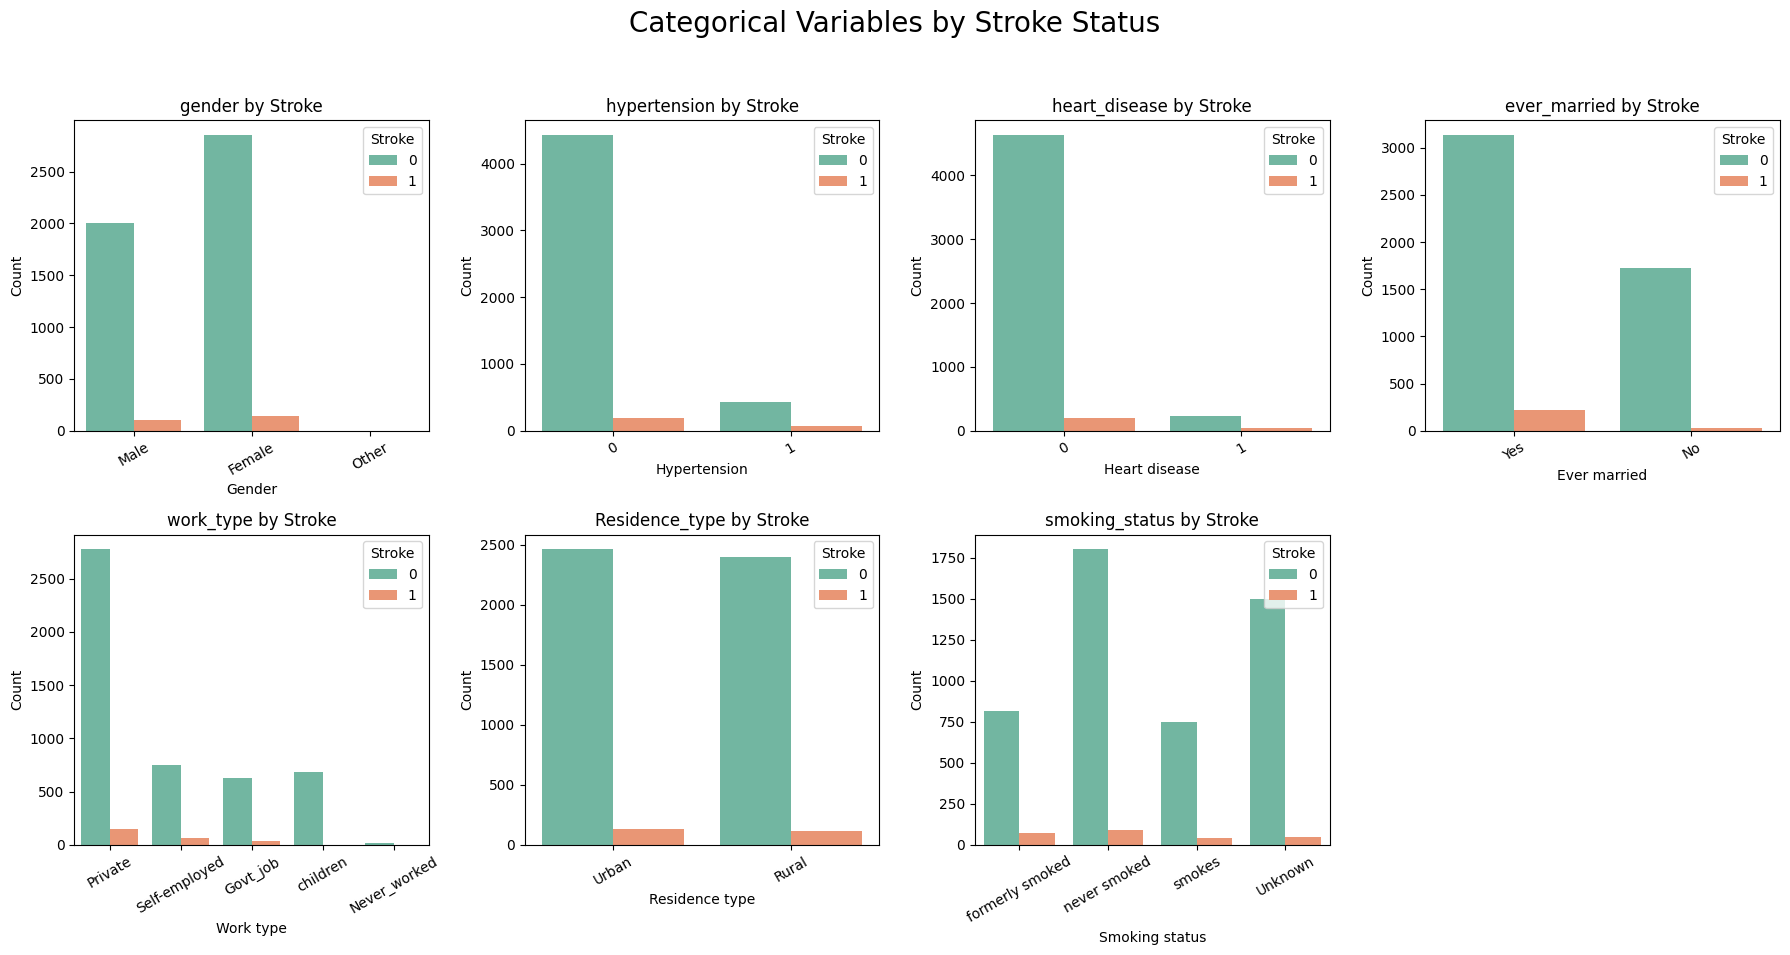

In [16]:
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'smoking_status']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, hue='stroke', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{var} by Stroke')
    axes[i].set_xlabel(var.replace('_', ' ').capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='Stroke', loc='upper right')

for j in range(len(categorical_vars), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Categorical Variables by Stroke Status", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- **Gender**: The distribution looks almost the same between Male and Female. Risk of Stroke also in both male and female are same.
- **Hypertension**: The most noticeable difference is here. This suggests hypertension is a strong predictor.
- **Heart Disease**: Similar to hypertension, this may be a good predictor.
- **Ever Married**: There is a visible difference, with married people having a higher chance of having a stroke.
- **Work Type**: People who work in the private sector seems to have stroke incidents.
- **Residence Type**: A slightly higher proportion of urban residents experienced strokes compared to rural residents. The difference is not very pronounced.
- **Smoking Status**: "Never Smoked" have more strokes cases than "formerly smoked"

**Important Considerations**:
Correlation vs. Causation: These plots only show associations. They do not prove that these factors cause strokes. There may be confounding variables at play Other Factors: This is not an exhaustive list. Other variables (age, glucose level, BMI) would be valuable in a full model.